<a href="https://colab.research.google.com/github/JoehIreri/Supervised-Learning-Decision-Tree/blob/main/Pima_Indian_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

In [14]:
file_path = "/content/diabetes.csv"
df = pd.read_csv("/content/diabetes.csv")

In [15]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Checking missing values in each column

In [16]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [17]:
# Splitting features and target variable
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable


In [18]:
# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)  # Choose k=5
knn.fit(X_train, y_train)  # Train the model
y_pred_knn = knn.predict(X_test)  # Predict on test data

In [22]:
# Evaluate K-NN Model
print("\nK-Nearest Neighbors Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors Model Evaluation:
Accuracy: 0.6883
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154

Confusion Matrix:
 [[79 20]
 [28 27]]


In [23]:
# Naïve Bayes Model
nb = GaussianNB()  # Create model
nb.fit(X_train, y_train)  # Train model
y_pred_nb = nb.predict(X_test)  # Predict on test data

In [24]:
print("\nNaïve Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naïve Bayes Model Evaluation:
Accuracy: 0.7662
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
 [[79 20]
 [16 39]]


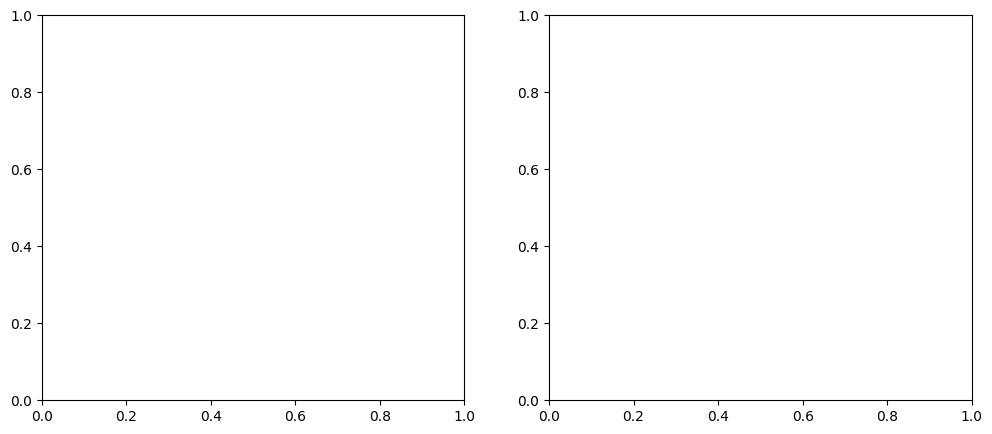

In [26]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

In [27]:
# KNN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("K-NN Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

Text(120.72222222222221, 0.5, 'True Label')

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Naïve Bayes Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

Text(627.9949494949494, 0.5, 'True Label')

In [29]:
plt.show()